<div style="width:100%;text-align: center;"> <img align=middle src="https://daxg39y63pxwu.cloudfront.net/images/blog/churn-models/Customer_Churn_Prediction_Models_in_Machine_Learning.webp"> </div>


<div style="width:100%;text-align: center;"> <img align=middle src="https://media3.giphy.com/media/xT9C25UNTwfZuk85WP/200.webp?cid=ecf05e47ungpqh7d0csdvbnaue4v9lnjfwb35lkqvr614zc1&rid=200.webp&ct=g"> </div>

# <h1 style='background:#094074; border:0; color:white'><center> 🚀EDA: Churn Analysis</center></h1> 

# **<span style="color:#094074;">⚙EDA Process</span>**

> 1. Importing a dataset

> 2. Understanding the big picture

> 3. Preparation / Data Cleaning

> 4. Understanding and exploring Data

> 5. Study of the relationships between variables

> 6. Plotting Data to infer results

> 7. Conclusion


# **<span style="color:#FE9000;">📰Problem Statement</span>**
<h2><b>Primary objective</b></h2>
Identify patterns, factors, and trends that contribute to customer churn, which occurs when customers discontinue their engagement with a product, service, or brand. By analyzing this data, we can uncover insights into customer behavior, preferences, and pain points that may lead to churn.

<h2><b>Secondary objective</b></h2> 
Involves the examination of various features, such as customer demographics, usage patterns, satisfaction levels, and interactions, using statistical and machine learning techniques to build predictive models that help businesses proactively address and reduce customer churn.

# **<span style="color:#FE9000;">📁Dataset Details</span>**

This dataset has 21 columns, namely:

> Customers who left within the last month – the column is called Churn (Target Column)

> Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

> Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

> Demographic info about customers – gender, age range, and if they have partners and dependents


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **<span style="color:#FE0000;">Dataset Loading</span>**

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.shape

(7043, 21)

# **<span style="color:#FFDD4A;">🧹 Data Cleaning</span>**

### Dropping Column ID because its statistically insignificant

In [7]:
df = df.drop('customerID',axis=1)

### Checking for Missing Values

In [8]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df[df['TotalCharges'] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


#### These are containing Null values of Total Charges, but since they are very less in number, we are removing these records

In [10]:
condition = df['TotalCharges'] == ' '
df = df[~condition]

### Checking for Duplicate values

In [11]:
df[df.duplicated()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
964,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.7,Yes
1338,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
1491,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
1739,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.9,Yes
1932,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.2,No
2713,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
2892,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,20.45,No
3301,Female,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.6,Yes
3754,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
4098,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,20.2,Yes


### Removing Duplicate Records

In [12]:
df = df.drop_duplicates()

In [13]:
df.shape

(7010, 20)

#### Need to convert Monthly Charges and Total Charges column data types to numerical format

In [14]:
df['MonthlyCharges'] = df['MonthlyCharges'].astype(float)

In [15]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

### Numerical and Categorical column identification

In [16]:
numerical_columns = list(df.columns[df.dtypes!='object'])
categorical_columns = list(df.columns[df.dtypes=='object'])
print(f'Numerical Columns   : {numerical_columns}')
print(f'Categorical Columns : {categorical_columns}')

Numerical Columns   : ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns : ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [17]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
df['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [19]:
df['TotalCharges'].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

### Statistical Overview of Numerical columns

In [20]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7010.000000,7010.000000,7010.000000,7010.000000
mean,0.162767,32.520399,64.888666,2290.353388
std,0.369180,24.520441,30.064769,2266.820832
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,408.312500
50%,0.000000,29.000000,70.400000,1403.875000
75%,0.000000,56.000000,89.900000,3807.837500
max,1.000000,72.000000,118.750000,8684.800000


### Statistical Overview of Categorical Columns

In [21]:
df[categorical_columns].describe()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3535,3617,4911,6330,3363,3090,3489,3079,3086,3464,2801,2773,3853,4158,2359,5153


### Outlier detection 

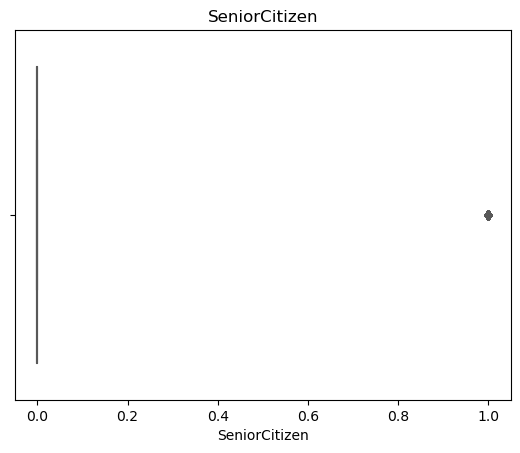

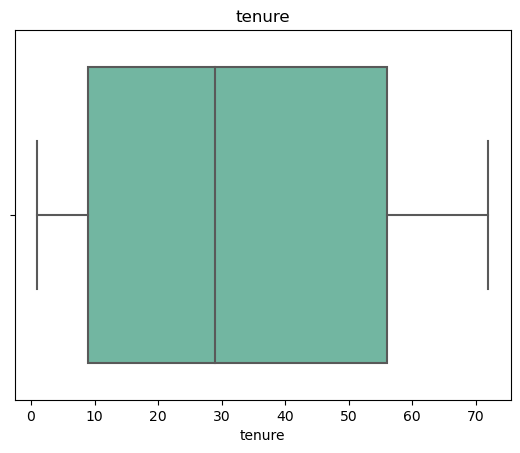

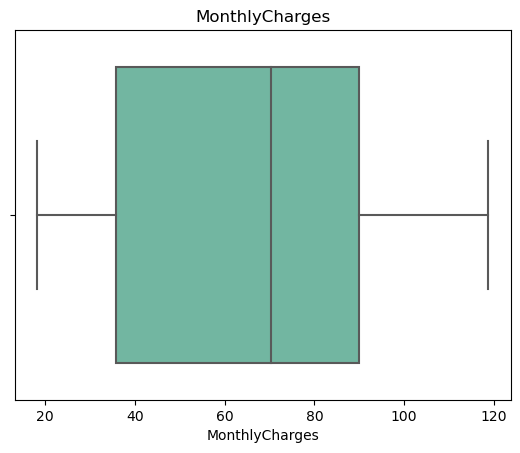

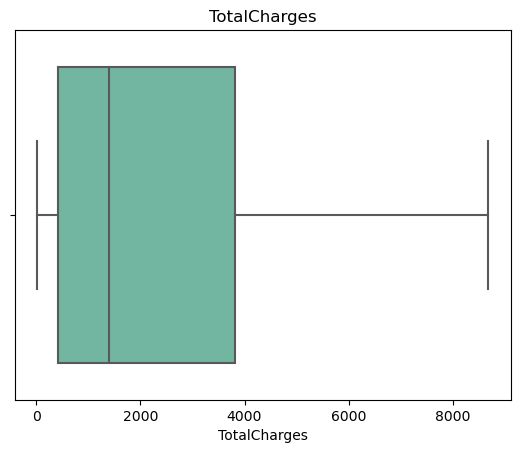

In [22]:
x = 1
for i in numerical_columns:
    sns.boxplot(data = df, x = i , palette="Set2")
    plt.title(i)
    print('\n')
    plt.show()

In [23]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

**<span style="color:#790252;"> Observations : <br>
    1. No outliers present for the numerical columns<br>
    2. Boxplot not showing for Senior Citizen because it has only 2 possible values of 0 or 1</span>**|

### Univariate Analysis

#### 1. Numerical Columns

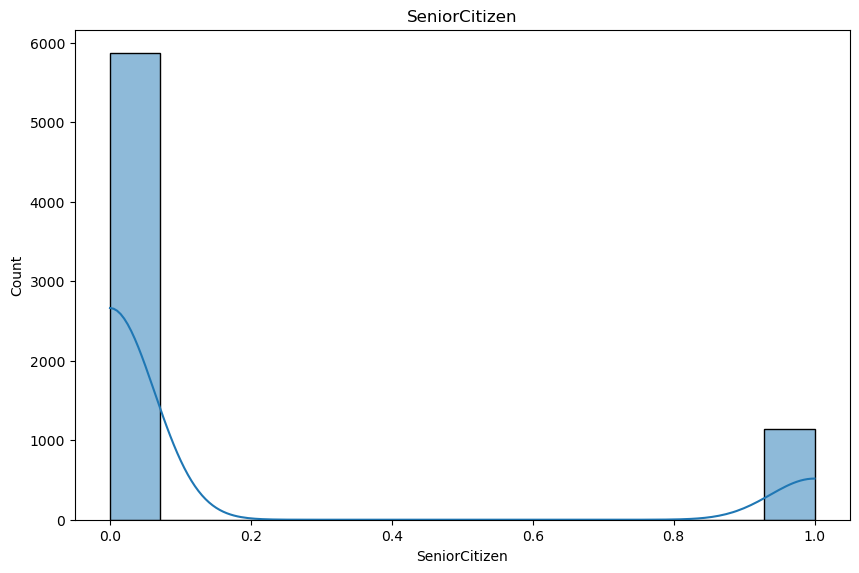

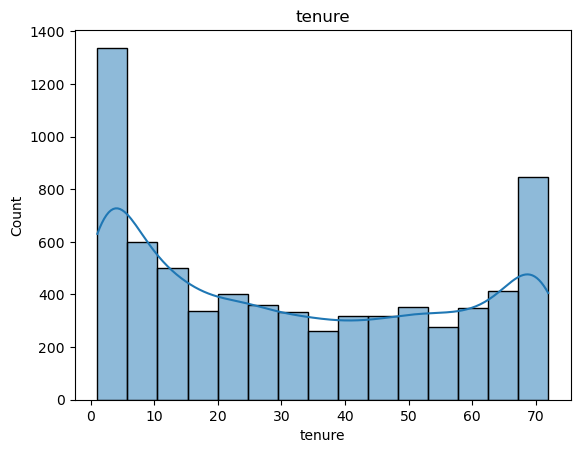

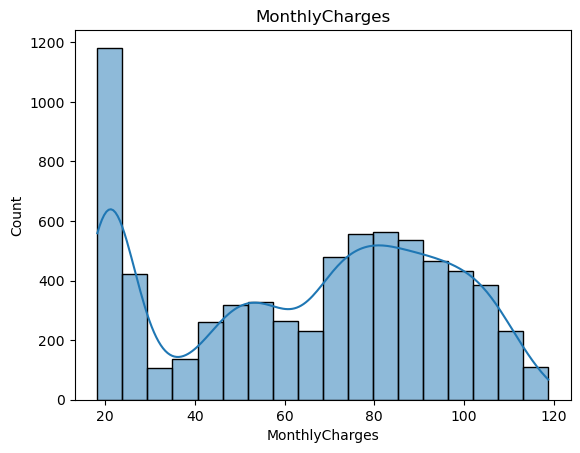

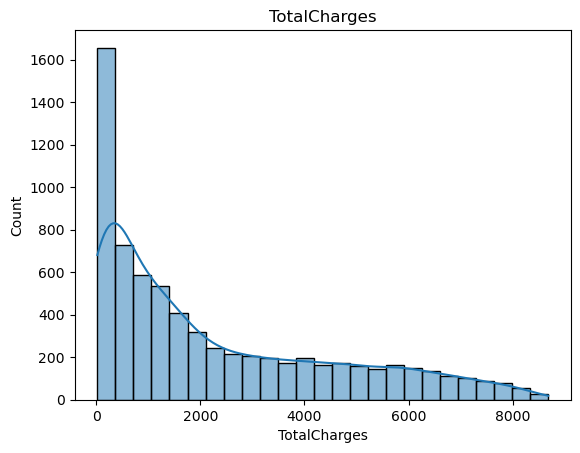

In [24]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(top = 0.5, bottom=0.01, hspace=0.5, wspace=0.5)
x = 1
for i in numerical_columns:
    sns.histplot(data = df, x = i, kde=True)
    plt.title(i)
    print('\n')
    plt.show()

**<span style="color:#790252;"> Observations : <br>
	1. Senior Citizens can be treated as a categorical feature because there are only 2 possible values : 0 or 1.<br>
	2. Most of the subscribers are young people.<br>
	3. Maximum people have tenure ranging between 0 to 5 years.<br>
	4. Most of the People have a monthly charges ranging between 20 to 25.<br>
	5. Most of the People have a total charge ranging between 0 to 400.</span>**

#### 2. Categorical Columns

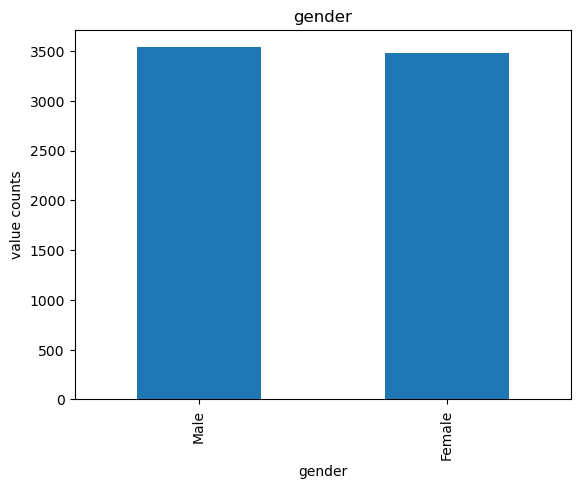

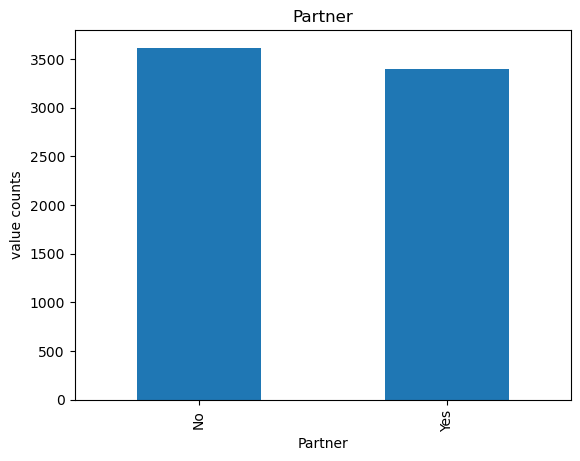

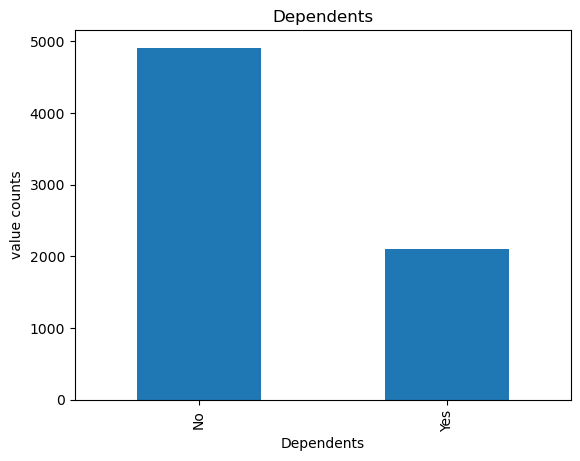

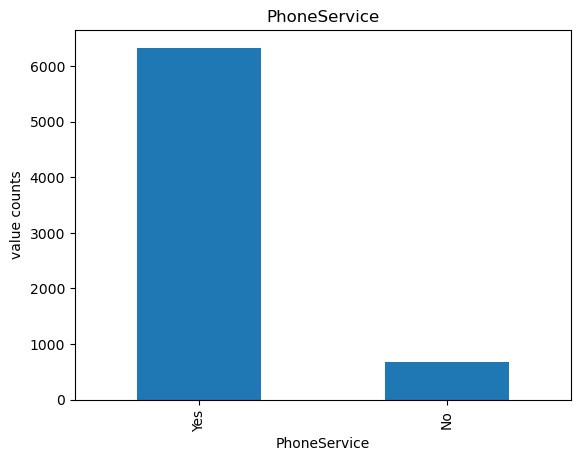

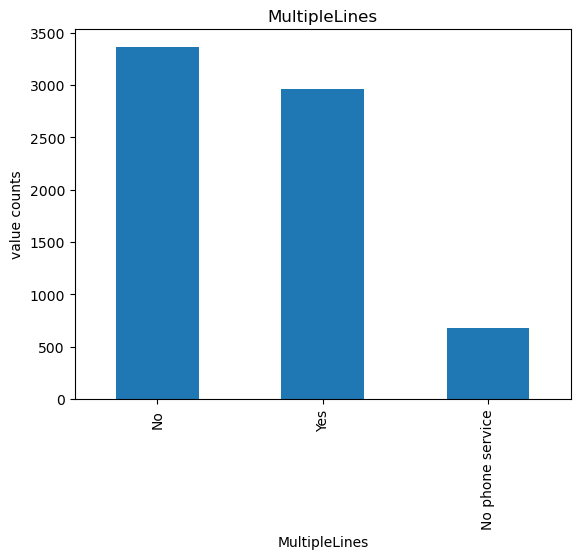

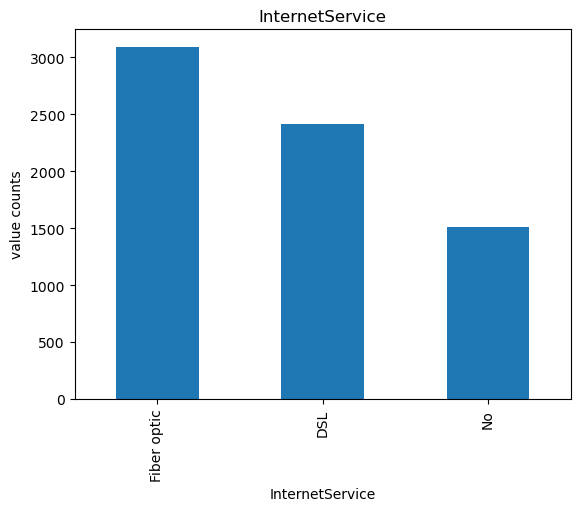

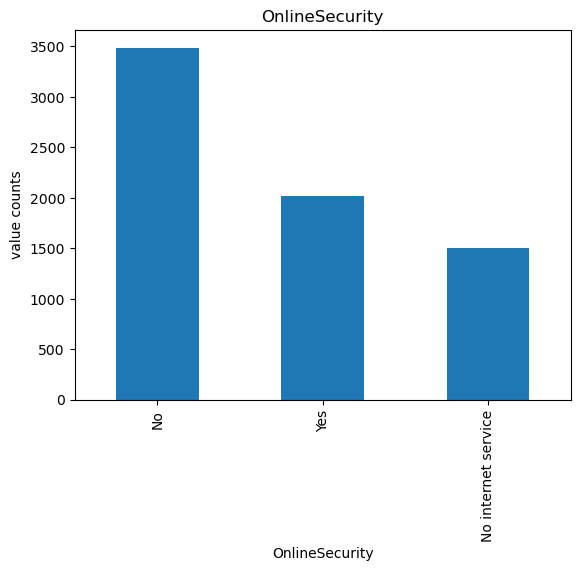

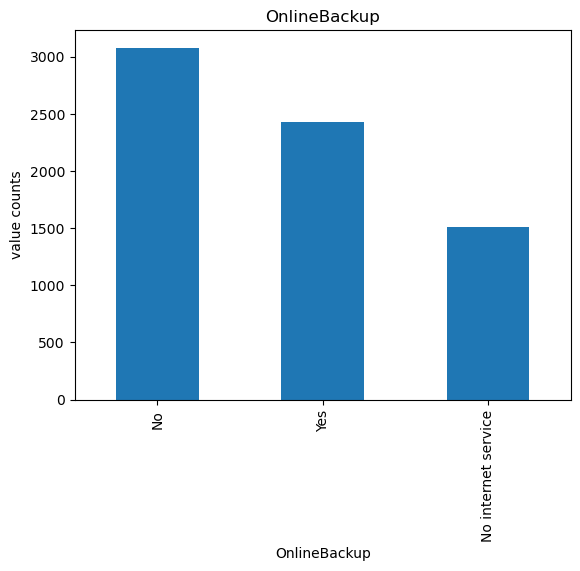

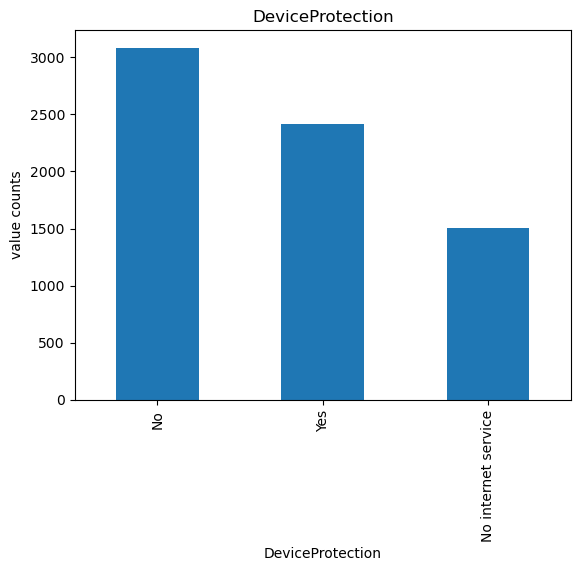

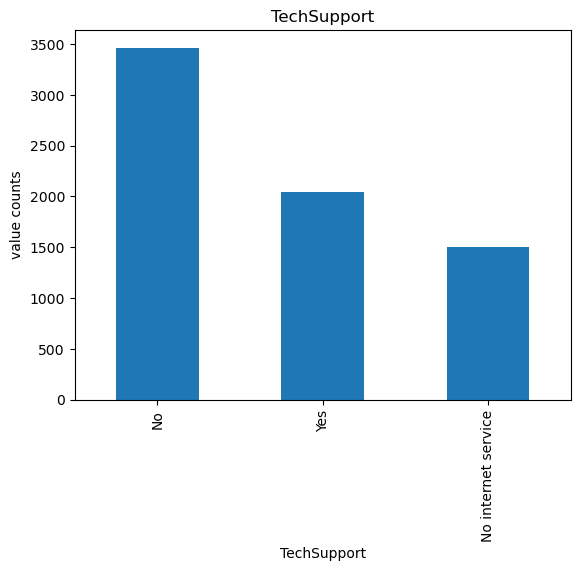

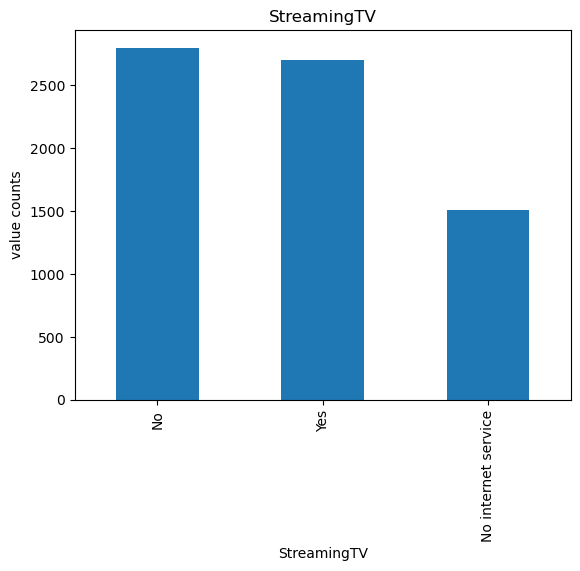

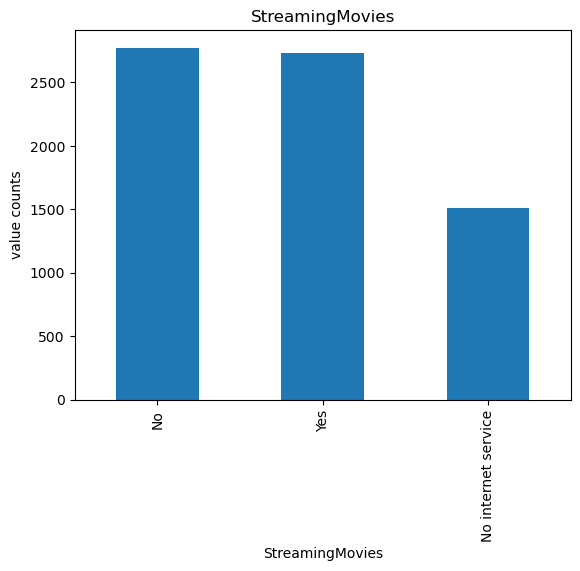

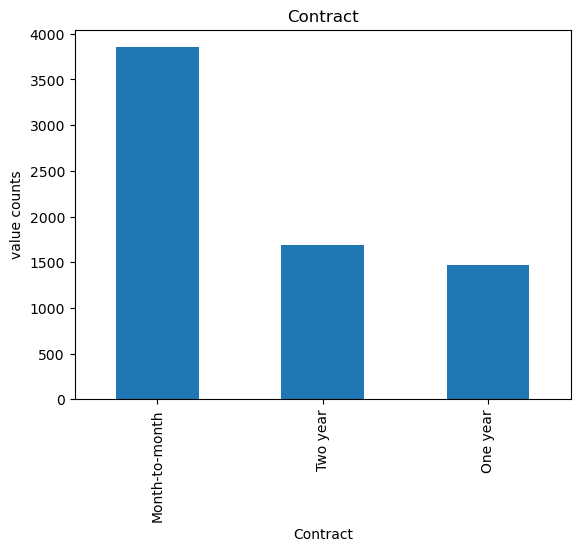

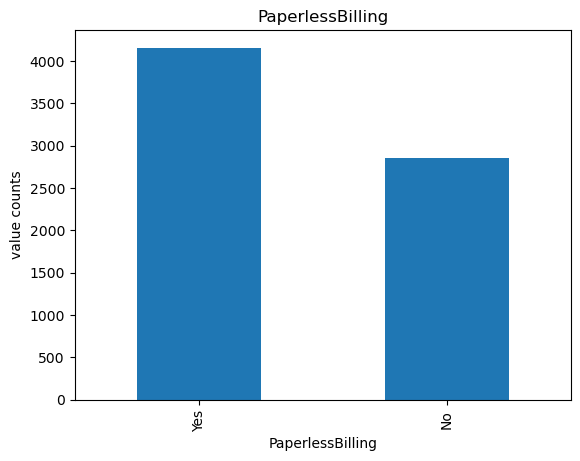

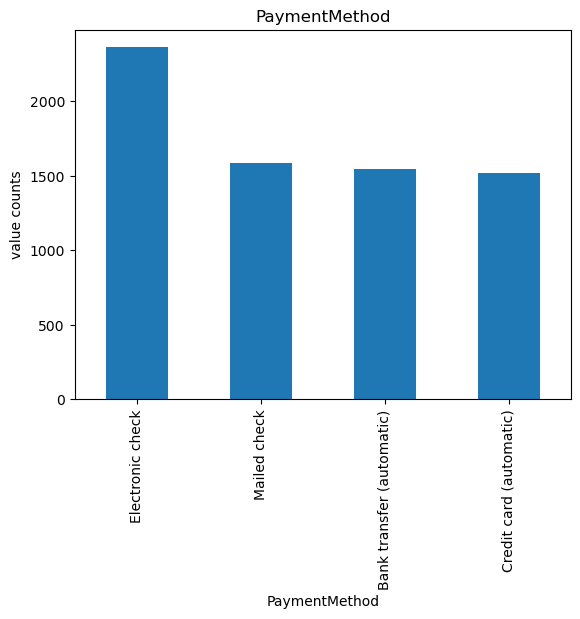

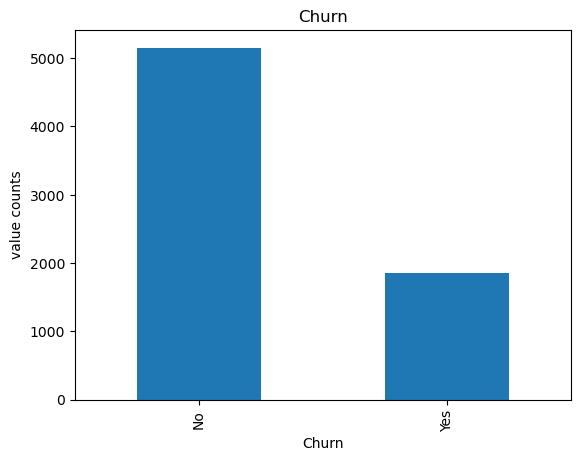

In [25]:
for i in categorical_columns:
    df[i].value_counts().plot(kind='bar', xlabel = i , ylabel='value counts', title = i)
    print('\n')
    plt.show()

**<span style="color:#790252;"> Observations:<br>
	1. Almost equal number of subscriptions can be found for both Male and Female customers.<br>
	2. Almost equal number of subscriptions can be found whether the person has a Partner or not.<br>
	3. More number of subsciptions are issued if the person doesn't have a dependent.<br>
	4. More number of subsciptions are issued if the person has a phone service.<br>
	5. Almost equal number of subscriptions are issued for a person if he/ she has multiple lines or not, but a significant 		lower number of subscriptions if the person doesn't have a phone service.<br>
	6. Highest number of subscriptions for people having Fiber Optic as their Internet Connection, followed by DSL and lower 		number of subscriptions for people who don't have an inernet connection.<br>
	7. Significant higher Count of subscriptions for people who don't have Online Security.<br>
	8. Higher Count of Subscriptions of people who don't have online backup.<br>
	9. Higher count of subscriptions of people who don't have device protection.<br>
	10. Significant higher count of subscriptions of people who don't opt for Tech Support.<br>
	11. Almost equal number of subscriptions can be found for people who do or don't opt for Streaming TV.<br>
	12. Almost equal number of subscriptions can be found for people who do or don't opt for Streaming Movies.<br>
	13. Significant higher count of subscriptions of people have opted for Month to Month contract plan , followed by 2 years 		and then 1 year.<br>
	14. Most of the subscriptions have opted for Paperless Billing.<br>
	15. Most of the subscriptions have chosen Electronic check as their payment Mode, followed by Mailed Check, Bank Transfer 		and Credit Card.<br>
	16. Most of the people have continued using the telecom service.<br></span>**

Text(0.5, 1.0, 'Churn Rate')

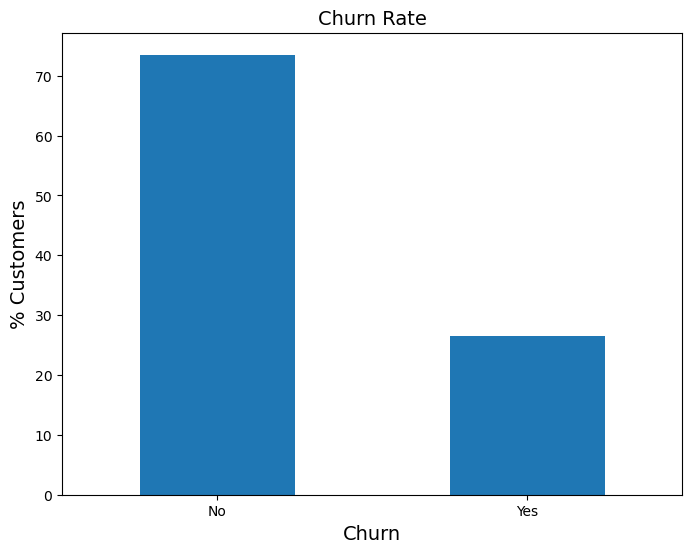

In [26]:
ax = (df['Churn'].value_counts()*100.0 /len(df)).plot(kind='bar', stacked = True,  rot = 0, figsize = (8,6))                                                                                                                                              
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

**<span style="color:#790252;"> Observation : <br>
    In our data, 74% of the customers do not churn. Clearly the data is skewed as we would expect a large majority of the 	customers to not churn. This is important to keep in mind for our modelling as skeweness could lead to a lot of false negatives. We will see in the modelling section on how to avoid skewness in the data.</span>**

### Bivariate Analysis

C:\Users\arany\AppData\Local\Temp\ipykernel_8152\807359217.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)


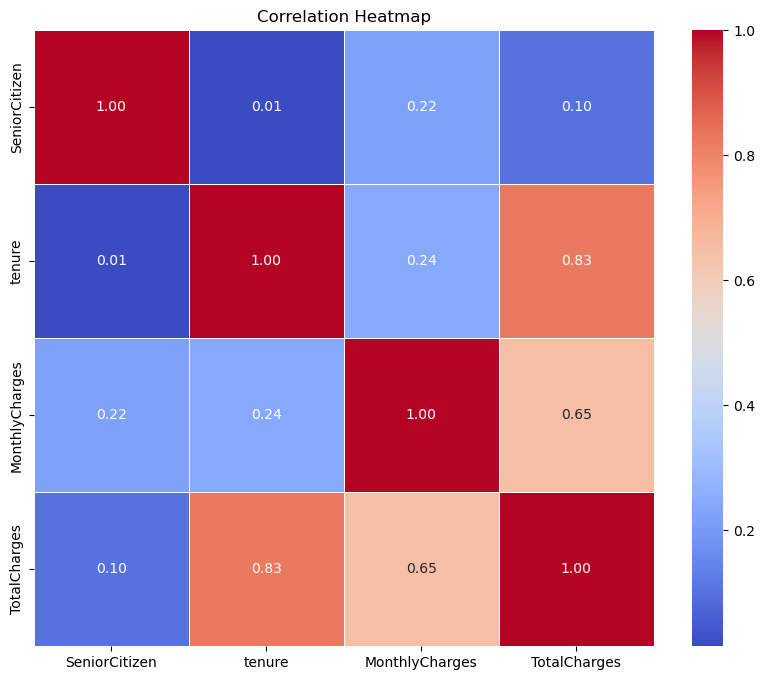

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

**<span style="color:#790252;">Observations :<br>
	1. Very High Positive Correlation can be found between Tenure and Total Charges<br>
	2. High Positve Correlation can be found between Monthly Charges and Total Charges</span>**

#### 1. Gender vise Churn distribution

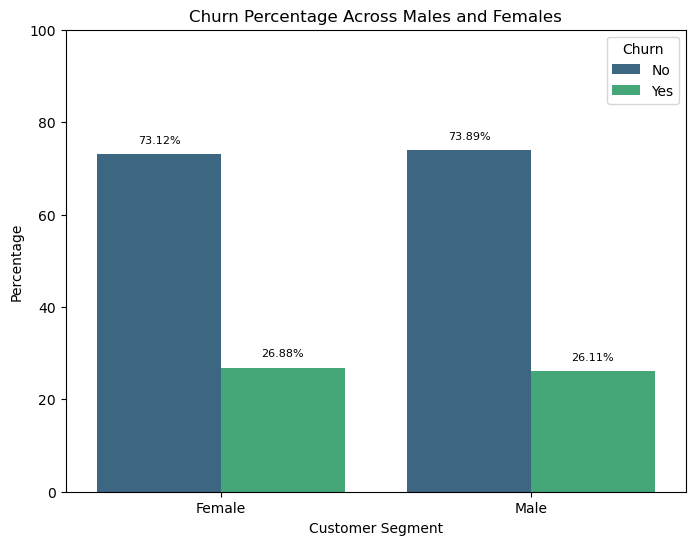

In [28]:
percentages = df.groupby(['gender', 'Churn']).size() / df.groupby('gender').size() * 100
percentages = percentages.reset_index(name='Percentage')

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='gender', y='Percentage', hue='Churn', data=percentages, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')

plt.title('Churn Percentage Across Males and Females')
plt.xlabel('Customer Segment')
plt.ylabel('Percentage')
plt.ylim(0, 100) 
plt.show()

**<span style="color:#790252;">Churn doesn't depend much on the Gender of the person</span>**

#### 2. Person seniority wise distribution of Churn

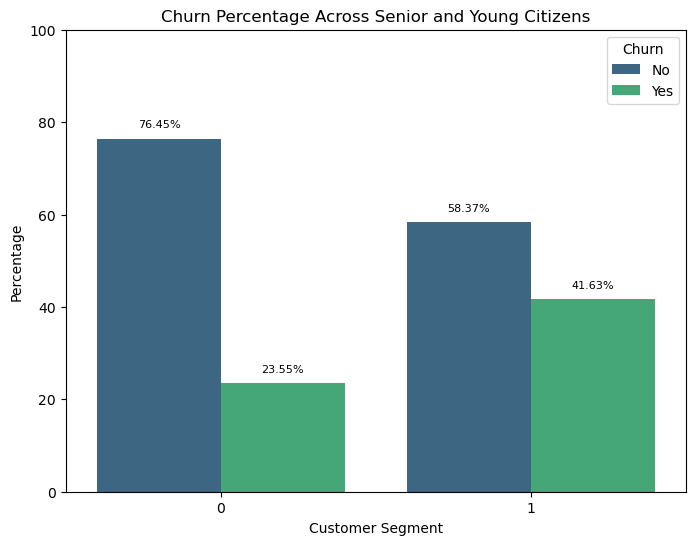

In [29]:
percentages = df.groupby(['SeniorCitizen', 'Churn']).size() / df.groupby('SeniorCitizen').size() * 100
percentages = percentages.reset_index(name='Percentage')

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='SeniorCitizen', y='Percentage', hue='Churn', data=percentages, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')

plt.title('Churn Percentage Across Senior and Young Citizens')
plt.xlabel('Customer Segment')
plt.ylabel('Percentage')
plt.ylim(0, 100) 
plt.show()

**<span style="color:#790252;"> Observations : <br>
	1. Out of the section of young people who have purachased subscription tend to have stayed<br>
	2. Most of the Senior citizens have opted for discontinuing the subscriptions<br>
	Business can target Young Audience to ensure longer subscriptions</span>**

#### 3. Dependence of Partner present distibution with Churn

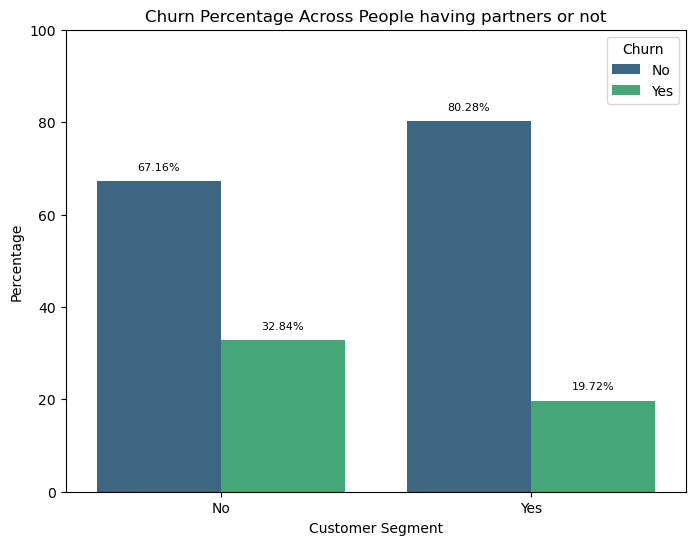

In [30]:
percentages = df.groupby(['Partner', 'Churn']).size() / df.groupby('Partner').size() * 100
percentages = percentages.reset_index(name='Percentage')

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Partner', y='Percentage', hue='Churn', data=percentages, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')

plt.title('Churn Percentage Across People having partners or not')
plt.xlabel('Customer Segment')
plt.ylabel('Percentage')
plt.ylim(0, 100) 
plt.show()

**<span style="color:#790252;">People having Partners are more likely to continue with the subscription services, so the business can target "Couples" for longer subscriptions</span>**

#### 4. People having dependents or not distribution with Churn

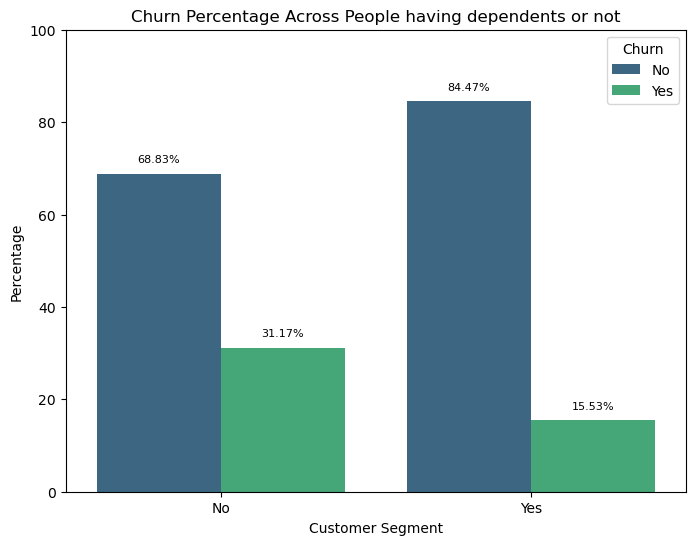

In [31]:
percentages = df.groupby(['Dependents', 'Churn']).size() / df.groupby('Dependents').size() * 100
percentages = percentages.reset_index(name='Percentage')

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Dependents', y='Percentage', hue='Churn', data=percentages, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')

plt.title('Churn Percentage Across People having dependents or not')
plt.xlabel('Customer Segment')
plt.ylabel('Percentage')
plt.ylim(0, 100) 
plt.show()

**<span style="color:#790252;">People having dependents are more likely to having longer subscriptions, so business should target people having dependents</span>**

#### 5. People having phone services distribution with Churn

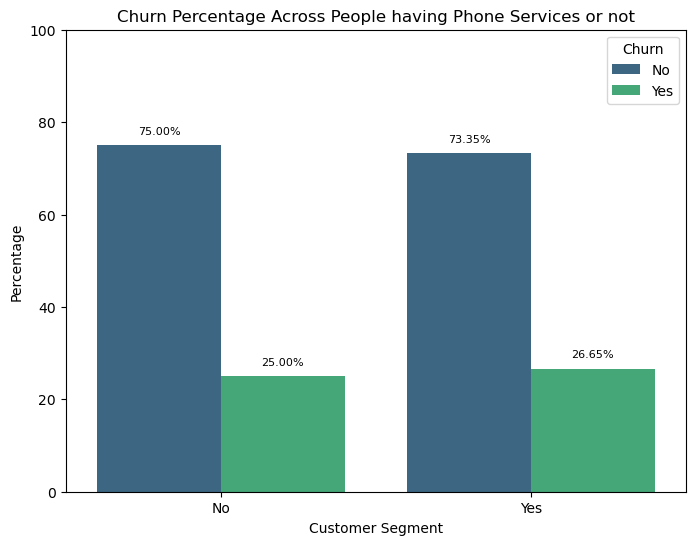

In [32]:
percentages = df.groupby(['PhoneService', 'Churn']).size() / df.groupby('PhoneService').size() * 100
percentages = percentages.reset_index(name='Percentage')

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='PhoneService', y='Percentage', hue='Churn', data=percentages, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')

plt.title('Churn Percentage Across People having Phone Services or not')
plt.xlabel('Customer Segment')
plt.ylabel('Percentage')
plt.ylim(0, 100) 
plt.show()

**<span style="color:#790252;">There is no significant relation with People having Phone services with Churn</span>**

#### 6. People having Mulitple lines distribution with Churn

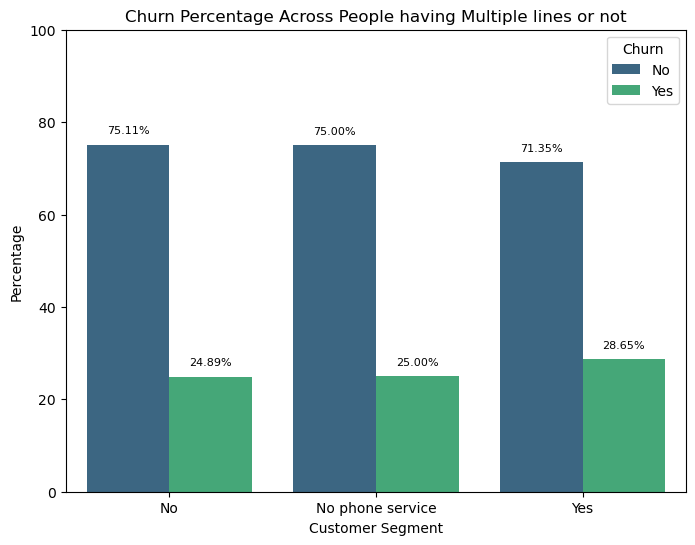

In [33]:
percentages = df.groupby(['MultipleLines', 'Churn']).size() / df.groupby('MultipleLines').size() * 100
percentages = percentages.reset_index(name='Percentage')

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='MultipleLines', y='Percentage', hue='Churn', data=percentages, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')

plt.title('Churn Percentage Across People having Multiple lines or not')
plt.xlabel('Customer Segment')
plt.ylabel('Percentage')
plt.ylim(0, 100) 
plt.show()

**<span style="color:#790252;">There is no significant relation with People having Multiple lines with Churn</span>**

#### 7. People opting for various Internet Service Distribution with Churn

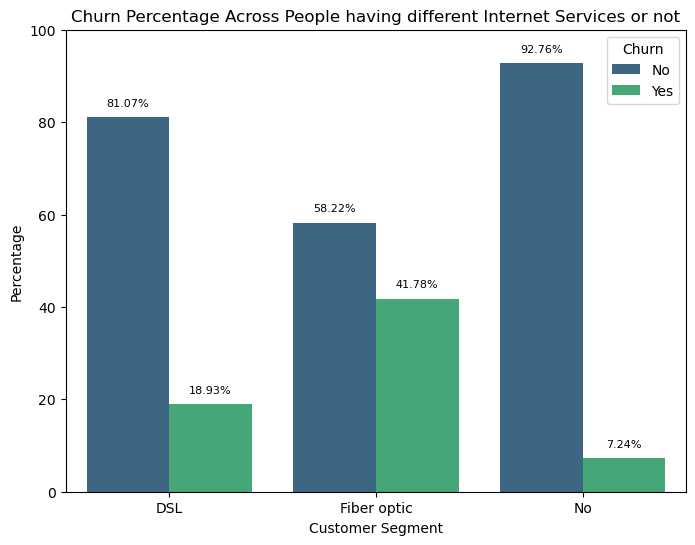

In [34]:
percentages = df.groupby(['InternetService', 'Churn']).size() / df.groupby('InternetService').size() * 100
percentages = percentages.reset_index(name='Percentage')

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='InternetService', y='Percentage', hue='Churn', data=percentages, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')

plt.title('Churn Percentage Across People having different Internet Services or not')
plt.xlabel('Customer Segment')
plt.ylabel('Percentage')
plt.ylim(0, 100) 
plt.show()

**<span style="color:#790252;"> Observations :<br>
	1. People opting for DSL are more likely to stay for longer subscriptions<br>
	2. People not opting for no Internet Services having the lowest Churn percentage<br>
	3. People opting for Fiber Optic are tend to leaving the earliest.<br>
	Business should focus more on Improving the Fiber Optic Quality , because customers are not satisfied with the Services.</span>**

#### 8. People opting for Online Security Distribution with Churn

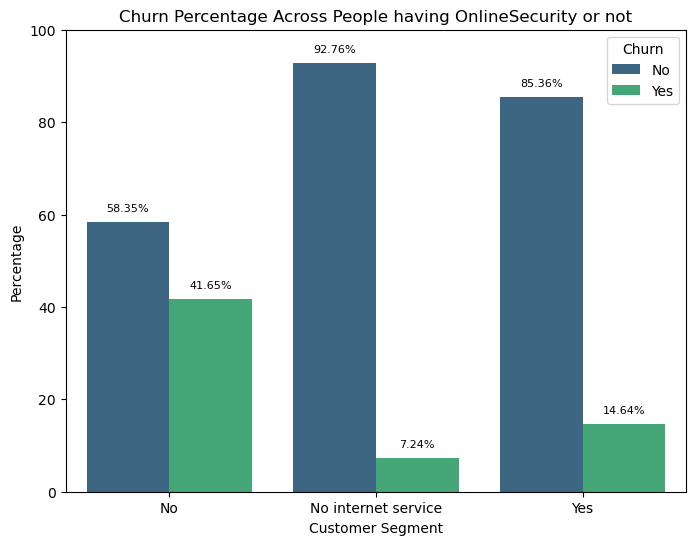

In [35]:
percentages = df.groupby(['OnlineSecurity', 'Churn']).size() / df.groupby('OnlineSecurity').size() * 100
percentages = percentages.reset_index(name='Percentage')

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='OnlineSecurity', y='Percentage', hue='Churn', data=percentages, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')

plt.title('Churn Percentage Across People having OnlineSecurity or not')
plt.xlabel('Customer Segment')
plt.ylabel('Percentage')
plt.ylim(0, 100) 
plt.show()

**<span style="color:#790252;">People having Online Security are having longer subscriptions, so business has a good portfolio providing good and reliable online security</span>**

#### 9. People opting for Online Backup Distribution with Churn

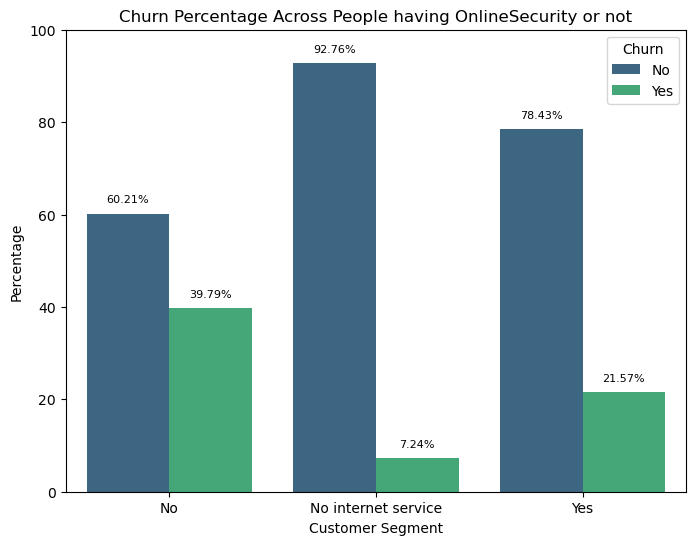

In [36]:
percentages = df.groupby(['OnlineBackup', 'Churn']).size() / df.groupby('OnlineBackup').size() * 100
percentages = percentages.reset_index(name='Percentage')

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='OnlineBackup', y='Percentage', hue='Churn', data=percentages, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')

plt.title('Churn Percentage Across People having OnlineSecurity or not')
plt.xlabel('Customer Segment')
plt.ylabel('Percentage')
plt.ylim(0, 100) 
plt.show()

**<span style="color:#790252;">People having Online Backup are having longer subscriptions, so business has a good portfolio providing good and reliable online backup system</span>**

#### 10. People opting for Device Protection Distribution with Churn

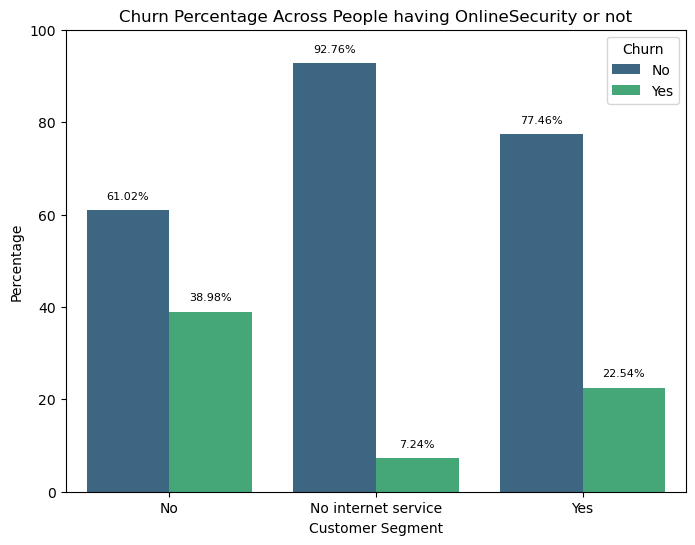

In [37]:
percentages = df.groupby(['DeviceProtection', 'Churn']).size() / df.groupby('DeviceProtection').size() * 100
percentages = percentages.reset_index(name='Percentage')

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='DeviceProtection', y='Percentage', hue='Churn', data=percentages, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')

plt.title('Churn Percentage Across People having OnlineSecurity or not')
plt.xlabel('Customer Segment')
plt.ylabel('Percentage')
plt.ylim(0, 100) 
plt.show()

**<span style="color:#790252;">People having Online Backup are having longer subscriptions, so business has a good portfolio providing good and reliable Device Protection</span>**

#### 11. Tech Support Distribution with Churn

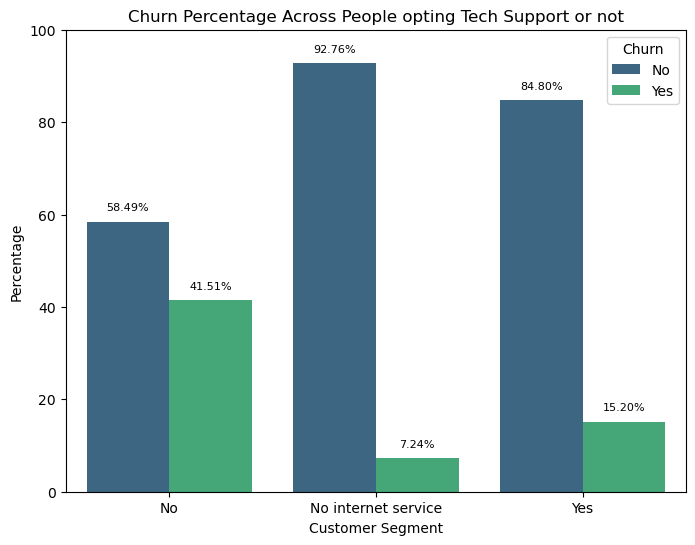

In [38]:
percentages = df.groupby(['TechSupport', 'Churn']).size() / df.groupby('TechSupport').size() * 100
percentages = percentages.reset_index(name='Percentage')

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='TechSupport', y='Percentage', hue='Churn', data=percentages, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')

plt.title('Churn Percentage Across People opting Tech Support or not')
plt.xlabel('Customer Segment')
plt.ylabel('Percentage')
plt.ylim(0, 100) 
plt.show()

**<span style="color:#790252;">People having Online Backup are having longer subscriptions, so business has a good portfolio providing good and reliable Tech Support Team</span>**

#### 12. Streaming TV or not distribution with Churn

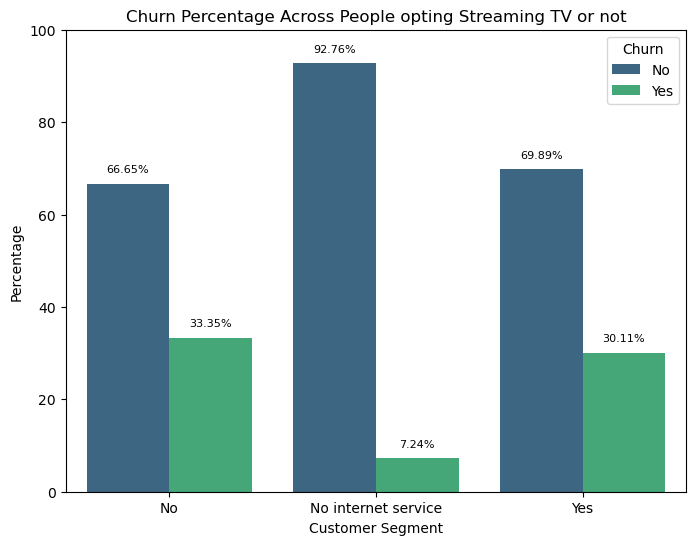

In [39]:
percentages = df.groupby(['StreamingTV', 'Churn']).size() / df.groupby('StreamingTV').size() * 100
percentages = percentages.reset_index(name='Percentage')

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='StreamingTV', y='Percentage', hue='Churn', data=percentages, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')

plt.title('Churn Percentage Across People opting Streaming TV or not')
plt.xlabel('Customer Segment')
plt.ylabel('Percentage')
plt.ylim(0, 100) 
plt.show()

**<span style="color:#790252;">Streaming TV or not is not playing a major role in Churn</span>** 

#### 13. Contract wise distribution of Churn

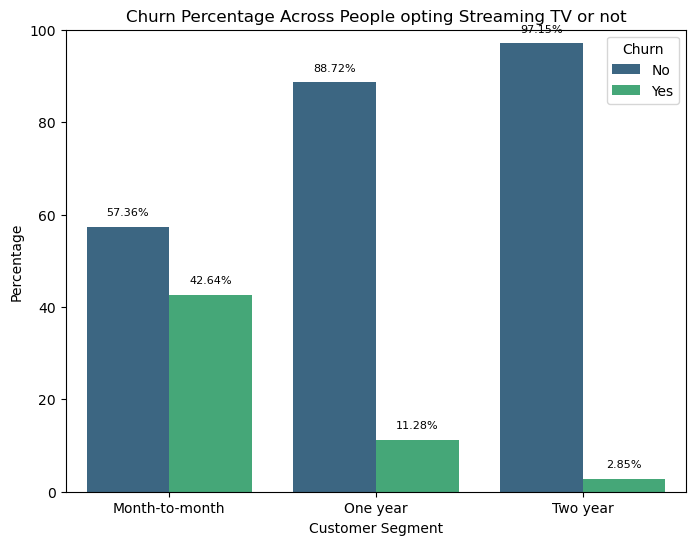

In [40]:
percentages = df.groupby(['Contract', 'Churn']).size() / df.groupby('Contract').size() * 100
percentages = percentages.reset_index(name='Percentage')

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Contract', y='Percentage', hue='Churn', data=percentages, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')

plt.title('Churn Percentage Across People opting Streaming TV or not')
plt.xlabel('Customer Segment')
plt.ylabel('Percentage')
plt.ylim(0, 100) 
plt.show()

**<span style="color:#790252;">People with 2 year or 1 year plans dont tend to leave , but that might be because their subscription has not ended, so this plot can't give much details on the Churn distribution.</span>**

#### 14. Paperless Billing distribution with Churn

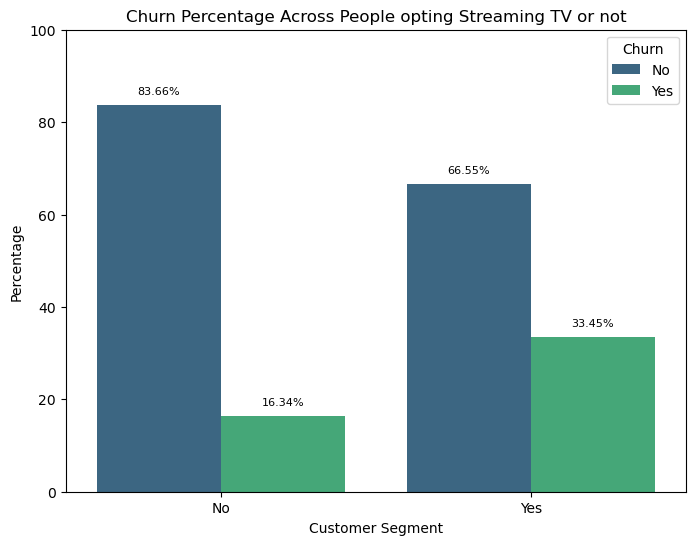

In [41]:
percentages = df.groupby(['PaperlessBilling', 'Churn']).size() / df.groupby('PaperlessBilling').size() * 100
percentages = percentages.reset_index(name='Percentage')

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='PaperlessBilling', y='Percentage', hue='Churn', data=percentages, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')

plt.title('Churn Percentage Across People opting Streaming TV or not')
plt.xlabel('Customer Segment')
plt.ylabel('Percentage')
plt.ylim(0, 100) 
plt.show()

**<span style="color:#790252;">People who have opted for Paperless Billing tend to have more Churn, so it would be advisable to the business to improve the Paperless Billing Standards.</span>**

In [42]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### 15. Payment method distribution with Churn

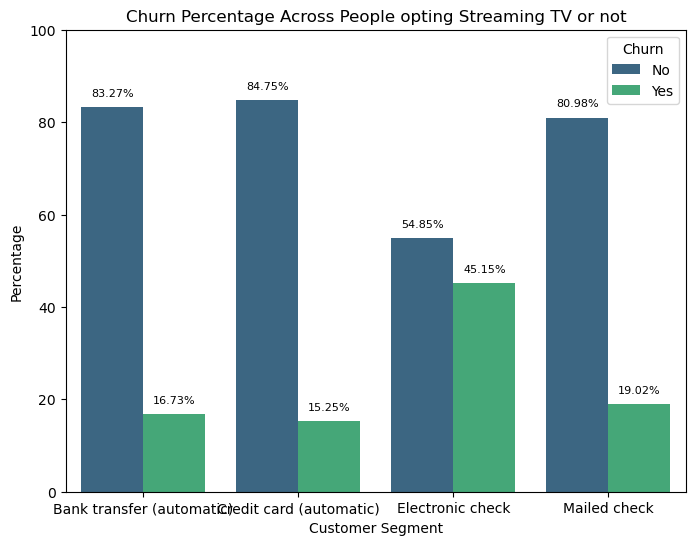

In [43]:
percentages = df.groupby(['PaymentMethod', 'Churn']).size() / df.groupby('PaymentMethod').size() * 100
percentages = percentages.reset_index(name='Percentage')

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='PaymentMethod', y='Percentage', hue='Churn', data=percentages, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')

plt.title('Churn Percentage Across People opting Streaming TV or not')
plt.xlabel('Customer Segment')
plt.ylabel('Percentage')
plt.ylim(0, 100) 
plt.show()

**<span style="color:#790252;">Electronic Check subscribers have shown a higher Churn percentage, Business needs to focus on providing a better ELectronic Check System</span>**

#### 16. Contract vs Tenure

Text(0.5, 1.0, 'Two Year Contract')

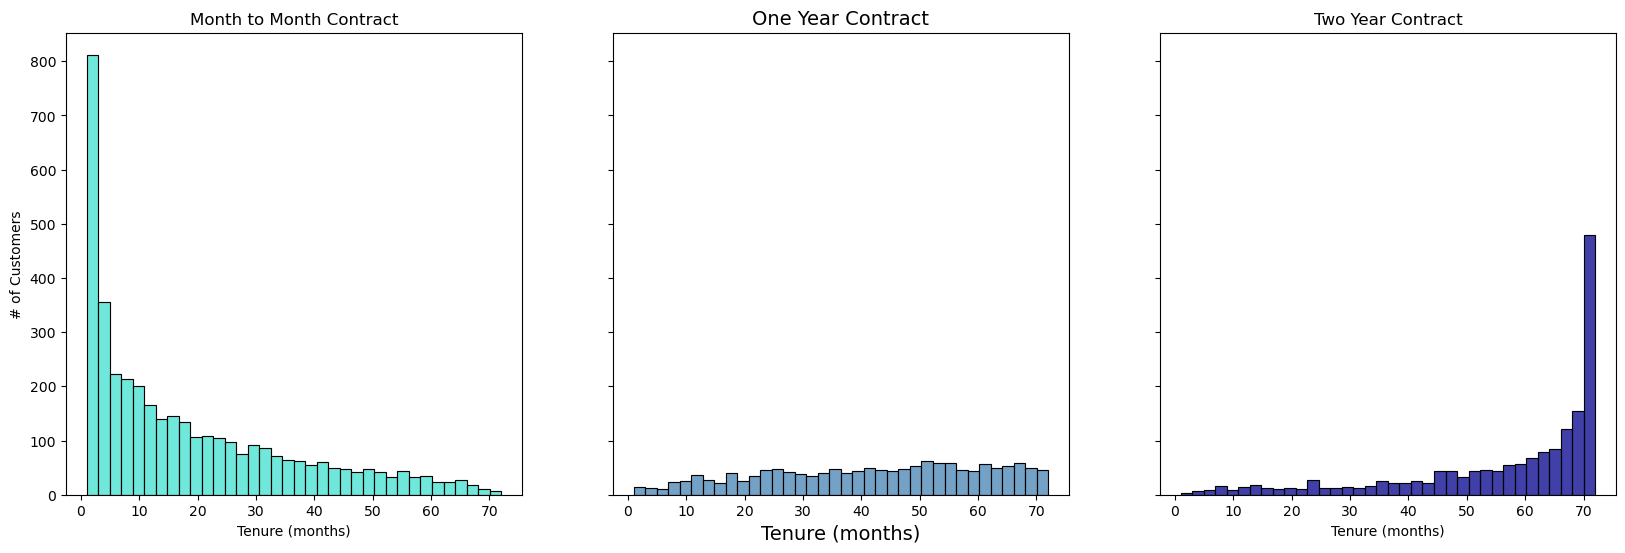

In [44]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.histplot(df[df['Contract']=='Month-to-month']['tenure'],
                    kde=False,
                   bins=int(180/5), color = 'turquoise',   
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.histplot(df[df['Contract']=='One year']['tenure'],
                    kde=False,
                   bins=int(180/5), color = 'steelblue',
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.histplot(df[df['Contract']=='Two year']['tenure'],
                    kde=False,
                   bins=int(180/5), color = 'darkblue',
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

**<span style="color:#790252;">Interestingly most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time.</span>**

#### 17. Churn vs Monthly Charges

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

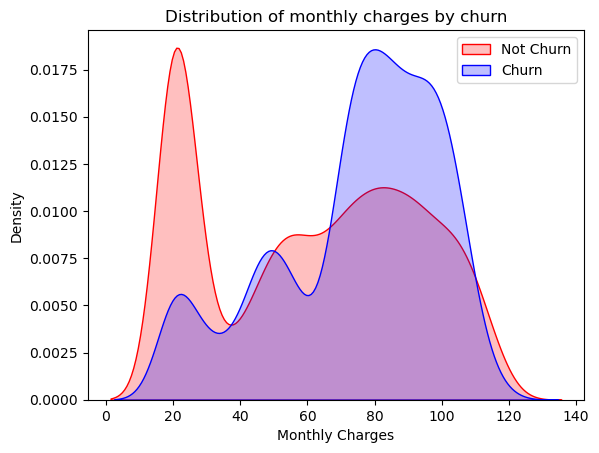

In [45]:
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", fill = True)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", fill= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

**<span style="color:#790252;">Higher % of customers churn when the monthly charges are high.</span>**

#### 18. Churn vs Total Charges

Text(0.5, 1.0, 'Distribution of total charges by churn')

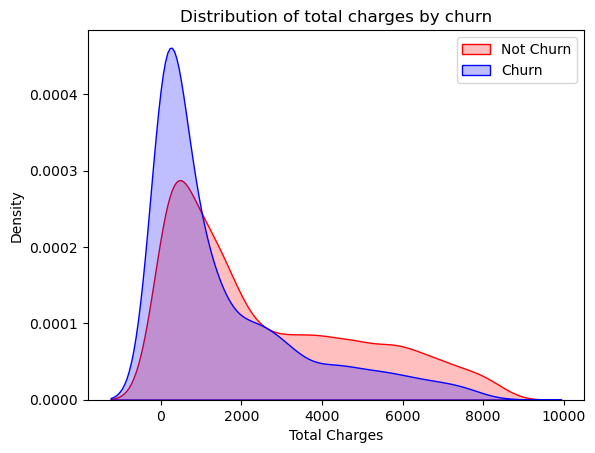

In [46]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Red", fill = True)
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", fill = True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

**<span style="color:#790252;">It seems that there is higher churn when the total charges are lower.</span>**

# **<span style="color:#cd486b;">🤘Conclusion</span>**


**<span style="color:#000000;">This marks the end of 🚀EDA: Churn Analysis</span>** 